In [28]:
# Import packages, the Y-matrix for the dataset and Functions.py
import numpy as np
%run 1.Dolphins_data_import.ipynb
import sys
sys.path.append('../')
from Functions import * 
import copy
import random
import seaborn as sns
import matplotlib.pyplot as plt
%store -r random_numbers_matrix

In [29]:
dim_array = [2,4,6,8,10,12,16]
alpha_array = [0,1,2,3,4,5,6,7,8,9]
heatmap = np.zeros((len(alpha_array),len(dim_array)))
heatmap_prior = np.zeros((len(alpha_array),len(dim_array)))

In [30]:
l = 0 

for dim in dim_array:
    # Define mu and cov_matrix to be able to sample #num_samples samples from a multivariate normal distribution
    mu = np.zeros(dim) 
    identity_matrix = np.eye(dim) 
    cov_matrix = identity_matrix
    num_samples = 62 

    points = {l+1: np.random.multivariate_normal(mu, cov_matrix) for l in range(num_samples)}

    j = 0
    for alpha in alpha_array:
        True_posetiv = np.zeros(len(random_numbers_matrix))
        True_negativ = np.zeros(len(random_numbers_matrix))
        False_posetiv = np.zeros(len(random_numbers_matrix))
        False_negativ = np.zeros(len(random_numbers_matrix))

        True_posetiv_prior = np.zeros(len(random_numbers_matrix))
        True_negativ_prior = np.zeros(len(random_numbers_matrix))
        False_posetiv_prior = np.zeros(len(random_numbers_matrix))
        False_negativ_prior = np.zeros(len(random_numbers_matrix))

        Accuracy = np.zeros(len(random_numbers_matrix))
        Accuracy_prior = np.zeros(len(random_numbers_matrix))
    
        for s in range(len(random_numbers_matrix)):
            Y_updated = np.delete(Y,random_numbers_matrix[s].flatten().astype(int), axis=0)

            prev_grad = 200
            grad = 0
            n = 100000
            points_copy = copy.deepcopy(points)
            points_copy_prior = copy.deepcopy(points)
            grad_sum = np.zeros(n) # Define the gradient sum
            k = 0

            while abs(prev_grad - grad) > 0.001: # stopping criteria
                prev_grad = grad
                for i in range(1,num_samples+1): # Run over number of num_samples
                    grad_now = Gradient_function_fast(i,dim,Y_updated,points_copy,alpha)
                    grad_sum[k] += np.sum((grad_now)**2)
                    points_copy[i] += LR(k)*grad_now # Use Gradient_function and take step=0.1*grad
                grad = grad_sum[k]
                k += 1

            connections = Y[random_numbers_matrix[s].flatten().astype(int), 0]
            point_a = [points_copy[i] for i in Y[random_numbers_matrix[s].flatten().astype(int),1]]
            point_b = [points_copy[i] for i in Y[random_numbers_matrix[s].flatten().astype(int),2]]
            points_a_np = np.array(point_a)
            points_b_np = np.array(point_b)

            distances = np.sum((points_a_np - points_b_np) ** 2, axis=1)
            sigmoid_value = 1 / (1 + np.exp(-1 * (alpha - distances)))

            True_posetiv[s] = np.sum(connections*sigmoid_value >= 0.5)
            False_posetiv[s] = np.sum(connections*sigmoid_value <= -0.5)
            True_negativ[s] = np.sum((connections*sigmoid_value > -0.5) & (connections*sigmoid_value <= 0))
            False_negativ[s] = np.sum((connections*sigmoid_value > 0) & (connections*sigmoid_value < 0.5))
    
            Accuracy[s] = (True_posetiv[s]+True_negativ[s])/(len(sigmoid_value))

            prev_grad = 200
            grad = 0
            points_copy_prior = copy.deepcopy(points)
            grad_sum = np.zeros(n) # Define the gradient sum
            k = 0

            while abs(prev_grad - grad) > 0.001: # stopping criteria
                prev_grad = grad
                for i in range(1,num_samples+1): # Run over number of num_samples
                    grad_now = Gradient_function_prior_fast(i,dim,Y_updated,points_copy_prior,alpha)
                    grad_sum[k] += np.sum((grad_now)**2)
                    points_copy_prior[i] += LR(k)*grad_now # Use Gradient_function and take step=0.1*grad
                grad = grad_sum[k]
                k += 1

            point_a = [points_copy_prior[i] for i in Y[random_numbers_matrix[s].flatten().astype(int),1]]
            point_b = [points_copy_prior[i] for i in Y[random_numbers_matrix[s].flatten().astype(int),2]]
            points_a_np = np.array(point_a)
            points_b_np = np.array(point_b)

            distances_prior = np.sum((points_a_np - points_b_np) ** 2, axis=1)
            sigmoid_value_prior = 1 / (1 + np.exp(-1 * (alpha - distances_prior)))

            True_posetiv_prior[s] = np.sum(connections*sigmoid_value_prior >= 0.5)
            False_posetiv_prior[s] = np.sum(connections*sigmoid_value_prior <= -0.5)
            True_negativ_prior[s] = np.sum((connections*sigmoid_value_prior > -0.5) & (connections*sigmoid_value_prior <= 0))
            False_negativ_prior[s] = np.sum((connections*sigmoid_value_prior > 0) & (connections*sigmoid_value_prior < 0.5))
    
            Accuracy_prior[s] = (True_posetiv_prior[s]+True_negativ_prior[s])/(len(sigmoid_value_prior))
        
        heatmap[j][l] = np.mean(Accuracy)
        heatmap_prior[j][l] = np.mean(Accuracy_prior)

        j += 1

        print(j)

    l += 1

1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10


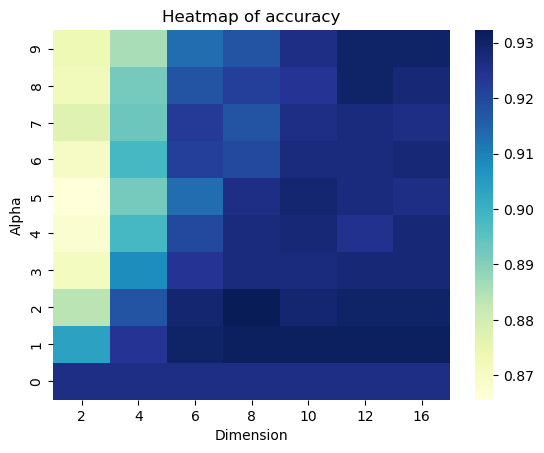

In [31]:
# Create heatmap with custom x-values
sns.heatmap(np.flip(heatmap, axis=0), cmap='YlGnBu', xticklabels=dim_array, yticklabels=np.flip(alpha_array, axis=0))

# Add labels and title
plt.xlabel('Dimension')
plt.ylabel('Alpha')
plt.title('Heatmap of accuracy')

# Show plot
plt.show()

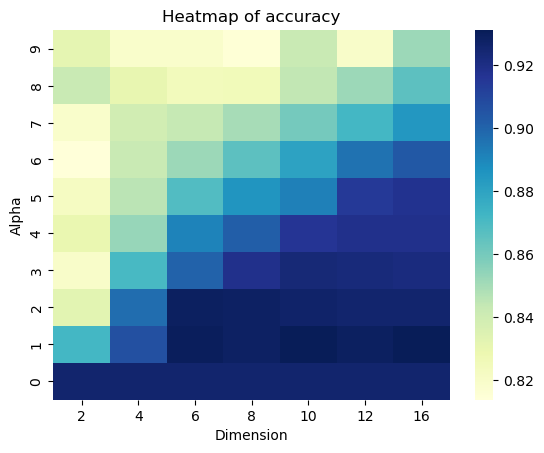

In [32]:
# Create heatmap with custom x-values
sns.heatmap(np.flip(heatmap_prior, axis=0), cmap='YlGnBu', xticklabels=dim_array, yticklabels=np.flip(alpha_array, axis=0))

# Add labels and title
plt.xlabel('Dimension')
plt.ylabel('Alpha')
plt.title('Heatmap of accuracy')

# Show plot
plt.show()